In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import time
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [31]:
ds=pd.read_csv("TrainingDataset.arff.txt",header=None, comment='@')
ds=shuffle(ds)
train, test = train_test_split(ds, test_size=0.2)
X_test = test.iloc[:,:np.shape(train)[1]-1]
Y_test = test.iloc[:,-1]

In [32]:
start_time= time.time()


C_range = np.logspace(-3 , 3, num=7)
parameters = {'C':C_range, 'kernel':['linear']}
train_scores_matrix = []
validation_scores_matrix = []
test_scores_matrix = []
best_estimators=[]

for n in range(0,10): 
    elapsed_time= time.time()
    print("\nIterazione",n)
    train_scores=[]
    validation_scores=[]
    test_scores=[]
    #mescolo i campioni in train e validation set
    train= shuffle(train)
    X_train = train.iloc[:,:np.shape(train)[1]-1]
    Y_train = train.iloc[:,-1]
    #GridSearch con i parametri definiti sopra
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters, cv=5, scoring="accuracy",n_jobs=-1, return_train_score=True)
    clf.fit(X_train, Y_train)
    best_estimators.append(clf.best_params_)
    
    for i in range(0,len(clf.cv_results_['params'])):
        print ("Modello:",clf.cv_results_['params'][i], "accuracy:",clf.cv_results_['mean_test_score'][i])
    
    #combinazioni di parametri
    hyperparameters = []
    for i in clf.cv_results_['params']:
        hyperparameters.append(i)
    
    #score sul test set per ogni combinazione
    for i in hyperparameters:
        temp_class = svm.SVC(kernel=i['kernel'],C=i['C'])
        temp_class.fit(X_train,Y_train)
        #n risultati sul test set 
        test_scores.append(temp_class.score(X_test,Y_test))
        
    for i in range (0,len(clf.cv_results_['mean_test_score'])): 
        validation_scores.append(clf.cv_results_['mean_test_score'][i])  
        train_scores.append(clf.cv_results_['mean_train_score'][i])
    
    #train validation e test scores per ogni shuffle
    train_scores_matrix.append(train_scores)
    validation_scores_matrix.append(validation_scores)
    test_scores_matrix.append(test_scores)
    
    elapsed_time=time.time()-elapsed_time
    print("\nElapsed time:",elapsed_time)

print(best_estimators)

elapsed_time=time.time()-start_time
print("\nTotal elapsed time:",elapsed_time)


Iterazione 0
Modello: {'C': 0.001, 'kernel': 'linear'} accuracy: 0.9154228855721394
Modello: {'C': 0.01, 'kernel': 'linear'} accuracy: 0.9225463591135233
Modello: {'C': 0.1, 'kernel': 'linear'} accuracy: 0.9262777023971054
Modello: {'C': 1.0, 'kernel': 'linear'} accuracy: 0.9270691994572592
Modello: {'C': 10.0, 'kernel': 'linear'} accuracy: 0.9271822704658526
Modello: {'C': 100.0, 'kernel': 'linear'} accuracy: 0.9271822704658526
Modello: {'C': 1000.0, 'kernel': 'linear'} accuracy: 0.9269561284486658

Elapsed time: 613.4236574172974

Iterazione 1
Modello: {'C': 0.001, 'kernel': 'linear'} accuracy: 0.9155359565807327
Modello: {'C': 0.01, 'kernel': 'linear'} accuracy: 0.9229986431478969
Modello: {'C': 0.1, 'kernel': 'linear'} accuracy: 0.925033921302578
Modello: {'C': 1.0, 'kernel': 'linear'} accuracy: 0.9269561284486658
Modello: {'C': 10.0, 'kernel': 'linear'} accuracy: 0.9266169154228856
Modello: {'C': 100.0, 'kernel': 'linear'} accuracy: 0.926729986431479
Modello: {'C': 1000.0, 'kerne

In [33]:
print("Train scores matrix", train_scores_matrix)
print("Validation scores matrix", validation_scores_matrix)
print("Test scores matrix", test_scores_matrix)


Train scores matrix [[0.9157903588899521, 0.9233378063907859, 0.9272952956991931, 0.9292457937746066, 0.9291609801309159, 0.9291609801309159, 0.929104451018423], [0.9155924710413142, 0.9234226440044184, 0.9276062857177101, 0.9290196213947709, 0.9291044270484813, 0.9291326916047277, 0.9289913608335147], [0.915733773847595, 0.9233378143807667, 0.9273801293178355, 0.9283977652024362, 0.9289348596859538, 0.9290479338909009, 0.9289631282371905], [0.9159034251049185, 0.9232247801257223, 0.9276063096876517, 0.9289914087733981, 0.9289631322321809, 0.9290479298959106, 0.9290761984471473], [0.915762114308657, 0.9233378423456985, 0.927493211512763, 0.9282281419100448, 0.9284260137787215, 0.928482550881195, 0.9286238936373788], [0.9159316976511456, 0.9231117059207754, 0.927295347634067, 0.9292458017645873, 0.9297263551506412, 0.9296698180481677, 0.9297263551506412], [0.9160446999462675, 0.9233095737944618, 0.9274649429615263, 0.9285108553873445, 0.928623941577262, 0.9286522101284987, 0.92862394956

In [34]:
train_means=[]
for i in range(0, np.shape(train_scores_matrix)[1]):
    temp_means=[]
    for j in range(0, np.shape(train_scores_matrix)[0]):
        temp_means.append(train_scores_matrix[j][i])
    train_means.append(np.mean(temp_means))
    
validation_means=[]
for i in range(0, np.shape(validation_scores_matrix)[1]):
    temp_means=[]
    for j in range(0, np.shape(validation_scores_matrix)[0]):
        temp_means.append(validation_scores_matrix[j][i])
    validation_means.append(np.mean(temp_means))
    
test_means=[]
for i in range(0, np.shape(test_scores_matrix)[1]):
    temp_means=[]
    for j in range(0, np.shape(test_scores_matrix)[0]):
        temp_means.append(test_scores_matrix[j][i])
    test_means.append(np.mean(temp_means))



validation scores: [0.915547263681592, 0.9226594301221167, 0.9260967887833559, 0.9270126639529626, 0.9272840343735866, 0.927295341474446, 0.927295341474446] 
train scores: [0.9158214566933067, 0.9233265465106756, 0.9275073601703465, 0.9288585441855913, 0.928971613996049, 0.9289913991854215, 0.9289829226150406] 
test scores: [0.9158751696065129, 0.9235639981908641, 0.9263681592039801, 0.9276345545002261, 0.9271822704658526, 0.9271822704658526, 0.9271822704658526]


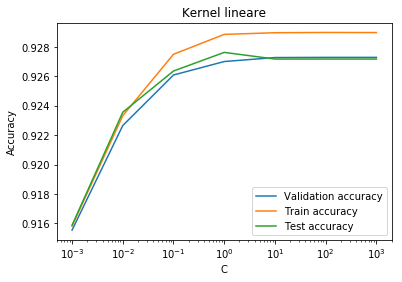

In [35]:
print ("validation scores:",validation_means,"\ntrain scores:",train_means,"\ntest scores:",test_means)
plt.plot(C_range,validation_means)
plt.plot(C_range,train_means)
plt.plot(C_range,test_means)
plt.xlabel("C")
plt.xscale('log')
plt.ylabel("Accuracy")
plt.title("Kernel lineare")
plt.legend(['Validation accuracy','Train accuracy','Test accuracy'], prop={'size': 10})
plt.show()

In [ ]:
start_time= time.time()


C_range = np.logspace(-1 , 1, num=3)
Gamma_range = np.logspace(-1 , 1, num=2)
parameters = {'C':C_range, 'gamma':Gamma_range,'kernel':['rbf']}

train_scores_matrix = []
validation_scores_matrix = []
test_scores_matrix = []
best_estimators=[]

for n in range(0,5): 
    elapsed_time= time.time()
    print("\nIterazione",n)
    train_scores_c_perIter = []
    validation_scores_c_perIter = []
    test_scores_c_perIter = []
    
    #mescolo i campioni in train e validation set
    train= shuffle(train)
    X_train = train.iloc[:,:np.shape(train)[1]-1]
    Y_train = train.iloc[:,-1]
    #GridSearch con i parametri definiti sopra
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters, cv=5, scoring="accuracy",n_jobs=-1, return_train_score=True)
    clf.fit(X_train, Y_train)
    best_estimators.append(clf.best_params_)
    
    for i in range(0,len(clf.cv_results_['params'])):
        print ("Modello:",clf.cv_results_['params'][i], "accuracy:",clf.cv_results_['mean_test_score'][i])
    
    ################    
    i=0
    maxdim=len(Gamma_range)
    while(i<len(clf.cv_results_['params'])):
        
        c=clf.cv_results_['params'][i]['C']

        train_scores_gamma_perC=[]
        validation_scores_gamma_perC=[]
        test_scores_gamma_perC=[]
        for j in range(i, i+maxdim):
            gamma=clf.cv_results_['params'][j]['gamma']
            validation_scores_gamma_perC.append(clf.cv_results_['mean_test_score'][j])  
            train_scores_gamma_perC.append(clf.cv_results_['mean_train_score'][j])
            
            temp_class = svm.SVC(kernel='rbf', C=c, gamma=gamma)
            temp_class.fit(X_train,Y_train)
            #n risultati sul test set 
            test_scores_gamma_perC.append(temp_class.score(X_test,Y_test))
        
        validation_scores_c_perIter.append(validation_scores_gamma_perC)
        train_scores_c_perIter.append(train_scores_gamma_perC)
        test_scores_c_perIter.append(test_scores_gamma_perC)

        i=i+maxdim
    #####################
    
    #train validation e test scores per ogni shuffle
    train_scores_matrix.append(train_scores_c_perIter)
    validation_scores_matrix.append(validation_scores_c_perIter)
    test_scores_matrix.append(test_scores_c_perIter)
    
    elapsed_time=time.time()-elapsed_time
    print("\nElapsed time:",elapsed_time)

print(best_estimators)

elapsed_time=time.time()-start_time
print("\nTotal elapsed time:",elapsed_time)


Iterazione 0
Modello: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'} accuracy: 0.9345318860244234
Modello: {'C': 0.1, 'gamma': 10.0, 'kernel': 'rbf'} accuracy: 0.557892356399819
Modello: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'} accuracy: 0.9574853007688828
Modello: {'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'} accuracy: 0.7591587516960652
Modello: {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'} accuracy: 0.9657394843962008
Modello: {'C': 10.0, 'gamma': 10.0, 'kernel': 'rbf'} accuracy: 0.7591587516960652

Elapsed time: 46.74356985092163

Iterazione 1


In [ ]:
train_means=[]
for g in range(0, np.shape(train_scores_matrix)[2]):
    temp_means=[]
    for c in range(0,np.shape(train_scores_matrix)[1]):
        gammac=[]
        for i in range(0, np.shape(train_scores_matrix)[0]):
            gammac.append(train_scores_matrix[i][c][g])
        temp_means.append(np.mean(gammac))
    train_means.append(temp_means)

train_means=np.transpose(train_means)


validation_means=[]
for g in range(0, np.shape(validation_scores_matrix)[2]):
    temp_means=[]
    for c in range(0,np.shape(validation_scores_matrix)[1]):
        gammac=[]
        for i in range(0, np.shape(validation_scores_matrix)[0]):
            gammac.append(validation_scores_matrix[i][c][g])
        temp_means.append(np.mean(gammac))
    validation_means.append(temp_means)

validation_means=np.transpose(validation_means)

      
test_means=[]
for g in range(0, np.shape(test_scores_matrix)[2]):
    temp_means=[]
    for c in range(0,np.shape(test_scores_matrix)[1]):
        gammac=[]
        for i in range(0, np.shape(test_scores_matrix)[0]):
            gammac.append(test_scores_matrix[i][c][g])
        temp_means.append(np.mean(gammac))
    test_means.append(temp_means)
      
test_means=np.transpose(test_means)

In [ ]:
print ("\ntrain scores:\n",train_means,"\nvalidation scores:\n",validation_means,"\ntest scores:\n",test_means)
label=[]
for i in C_range:
    label.append("C="+str(i))
for i in range(0,np.shape(train_means)[0]):
    plt.plot(Gamma_range,train_means[i])
plt.title('Kernel gaussiano: train accuracy')
plt.xlabel("gamma")
plt.xscale('log')
plt.ylabel("Accuracy")
plt.legend(label, prop={'size': 10})
plt.show()

for i in range(0,np.shape(validation_means)[0]):
    plt.plot(Gamma_range,validation_means[i])
plt.title('Kernel gaussiano: validation accuracy')
plt.xlabel("gamma")
plt.xscale('log')
plt.ylabel("Accuracy")
plt.legend(label, prop={'size': 10})
plt.show()

for i in range(0,np.shape(test_means)[0]):
    plt.plot(Gamma_range,test_means[i])
plt.title('Kernel gaussiano: test accuracy')
plt.xlabel("gamma")
plt.xscale('log')
plt.ylabel("Accuracy")
plt.legend(label, prop={'size': 10})
plt.show()